<a href="https://colab.research.google.com/github/4dsolutions/clarusway_data_analysis/blob/main/DAwPy_S8_(Handling%20with%20Outliers)/DAwPy-S8%20(Handling%20with%20Outliers).ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a><br/>
[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/clarusway_data_analysis/blob/main/DAwPy_S8_%28Handling%20with%20Outliers%29/DAwPy-S8%20%28Handling%20with%20Outliers%29.ipynb)


________

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 08</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Working with Outliers</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [HANDLING WITH OUTLIERS](#1)
* [CATCHING & DETECTING OUTLIERS](#2)
* [REMOVING THE OUTLIERS](#3)    
* [LIMITATION & TRANSFORMATION OF THE OUTLIERS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Handling with Outliers</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### What is Outlier? [Source](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.)

In general, <b>``Outliers``</b> are **unusual values** in your dataset, and they can **distort statistical analyses and violate their assumptions**. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are.

### Most common causes of outliers on a data set:

- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data) 

### Guideline for Handling Outliers [Source 01](https://statisticsbyjim.com/basics/remove-outliers/#:~:text=Outliers%20are%20unusual%20values%20in,what%20to%20do%20with%20them.) & [Source 02](https://www.researchgate.net/publication/258174106_Best-Practice_Recommendations_for_Defining_Identifying_and_Handling_Outliers)

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Catching and Detecting Outliers</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
import seaborn as sns  # already done, but harmless to do again

df = sns.load_dataset('diamonds')

More about this dataset [on Kaggle](https://www.kaggle.com/code/drvader/diamonds-dataset-exploration-and-regression/data).

![diamonds](https://i0.wp.com/www.adiamor.com/blog/wp-content/uploads/2017/04/Screen-Shot-2017-04-25-at-10.28.23-AM.png)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
df.cut.nunique()

5

In [7]:
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [8]:
df.groupby('cut')['cut'].count()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
(df.groupby('cut').
 agg({'price':np.mean, 'cut':np.size}).
 rename({'price':'av_price', 'cut':'count'}, axis=1).
 style.format({'av_price':"${:,.2f}"}))

,av_price,count
cut,,
Ideal,"$3,457.54",21551
Premium,"$4,584.26",13791
Very Good,"$3,981.76",12082
Good,"$3,928.86",4906
Fair,"$4,358.76",1610


In [10]:
df.cut.describe()['top']

'Ideal'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [12]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

`df.select_dtypes` is a new one.  Just include columns of the listed types.

In [13]:
df = df.select_dtypes(include = ['float64', 'int64'])  # drop category type cols
# df = df.dropna() no missing data to worry about
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
df.sort_values(["table"]).tail(20)

,carat,depth,table,price,x,y,z
52474,0.76,55.5,69.0,2518,6.16,6.07,3.39
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
40211,0.50,62.4,69.0,1122,5.07,4.99,3.14
777,0.75,55.8,70.0,2859,6.09,5.98,3.37
47149,0.71,62.1,70.0,1832,5.67,5.60,3.50
52393,0.82,56.7,70.0,2508,6.28,6.16,3.53
314,0.76,59.0,70.0,2800,5.89,5.80,3.46
51026,0.76,61.9,70.0,2328,5.84,5.77,3.59
52092,0.71,59.8,70.0,2458,5.89,5.72,3.48
42256,0.56,52.7,70.0,1293,5.71,5.57,2.97


In [15]:
df.sort_values(["price"]).tail(20)

,carat,depth,table,price,x,y,z
27730,2.08,58.7,60.0,18760,8.36,8.40,4.92
27731,2.55,61.8,62.0,18766,8.70,8.65,5.36
27732,1.71,62.1,55.0,18768,7.66,7.63,4.75
27733,1.51,62.6,59.0,18777,7.33,7.24,4.56
27734,2.06,62.2,55.0,18779,8.15,8.19,5.08
27735,1.60,62.0,56.0,18780,7.47,7.52,4.65
27736,2.03,63.0,60.0,18781,8.00,7.93,5.02
27737,2.05,60.2,59.0,18784,8.28,8.33,5.00
27738,2.05,61.9,57.0,18787,8.10,8.16,5.03
27739,2.80,63.8,58.0,18788,8.90,8.85,0.00


In [16]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Lets get into preview mode and do some generic visualizations that help us get a sense of the data.  Question: How does the cut of a diamond relate to its average price?  Answer:  it's certainly not the single determining factor.

Going back to the full dataset (all the columns):

In [17]:
df = sns.load_dataset('diamonds')

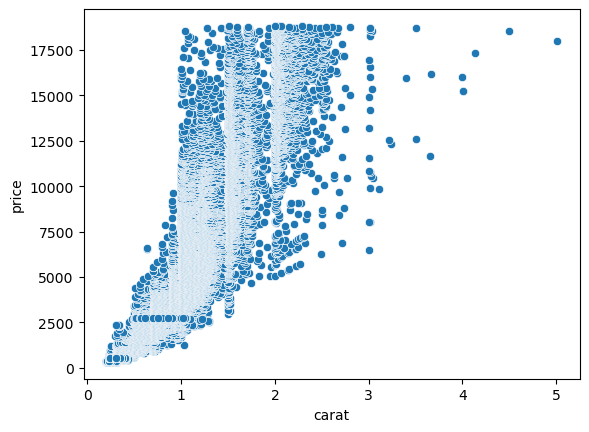

In [18]:
sns.scatterplot(data=df, x="carat", y="price");

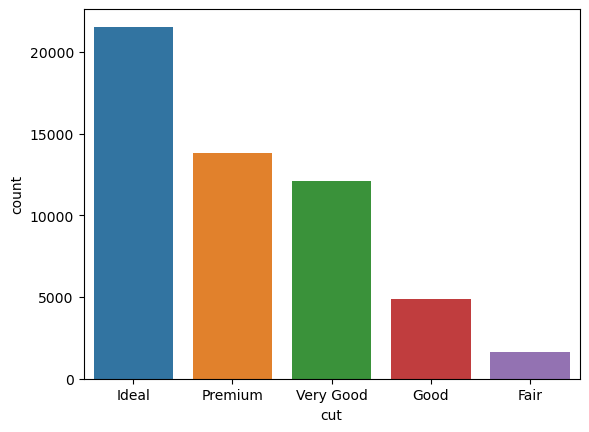

In [19]:
sns.countplot(data=df, x='cut');

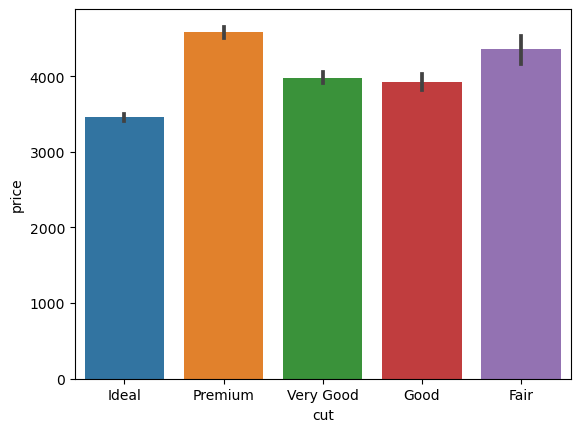

In [20]:
sns.barplot(data=df, x='cut', y='price');

### Detecting Outliers with Graphs

A boxplot shows them median and one quartile on each side, so down to 25% and up to 75%. 

Then the whiskers extend to 1.5 times the inter-quartile range i.e. 1.5 times the box width, but stop at the most extreme data points in either direction if they're within range.  If data falls outside the whiskers, it gots plotted as individual outlier points.

Lets return to working with numeric columns only.

In [21]:
df = df.select_dtypes(include = ['float64', 'int64'])  # drop category type cols
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


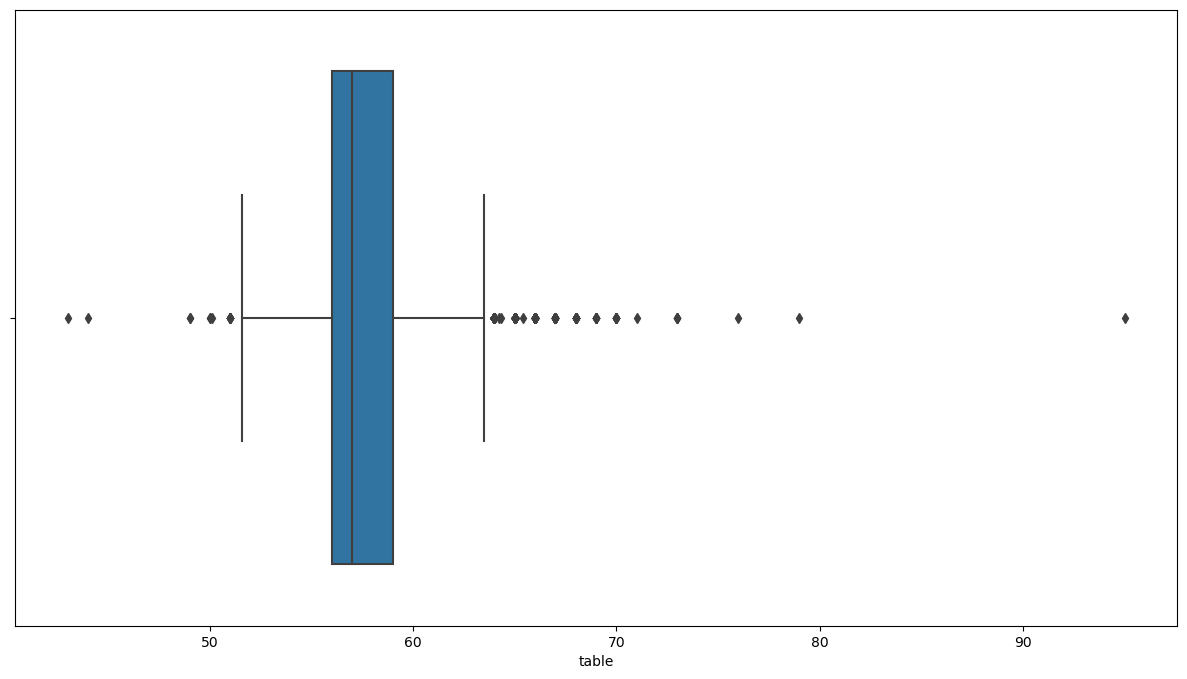

In [23]:
# you don't need to know how this plotting happens.
# just focus on quarters
# remember Statistics lesson IQR

plt.figure(figsize = (15, 8))
sns.boxplot(x = df['table']);

<Figure size 1500x800 with 0 Axes>

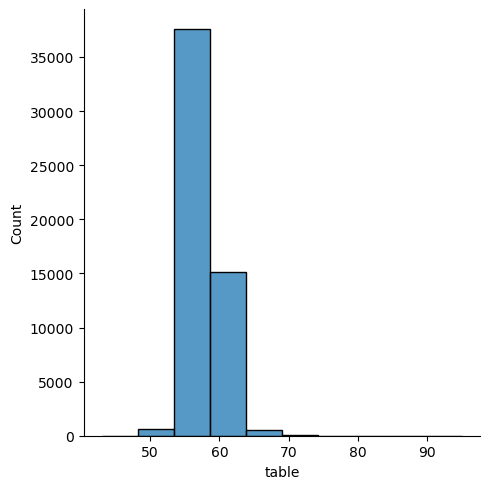

In [24]:
plt.figure(figsize = (15, 8))
sns.displot(df.table, kind="hist", bins = 10);

In [25]:
df["table"]

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

### Detecting Outliers with Tukey's Fences | Tukey's Rule

**- First way** of specifying **``Q1 & Q3``** is using the **``.quantile()``** method

In [26]:
Q1 = df["table"].quantile(0.25)
Q3 = df["table"].quantile(0.75)

IQR = Q3 - Q1

In [27]:
Q1

56.0

In [28]:
Q3

59.0

In [29]:
IQR

3.0

**- Second way** of specifying **``Q1 & Q3``** is using the **``.describe()``** method

In [30]:
df["table"].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [31]:
# think of the boxplot whiskers
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [32]:
lower_lim

51.5

In [33]:
upper_lim

63.5

In [34]:
(df.table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [35]:
(df.table > upper_lim).value_counts()

False    53351
True       589
Name: table, dtype: int64

In [36]:
df.table[(df.table < lower_lim) | (df.table > upper_lim)].count()

605

In [37]:
df.table[~((df.table < lower_lim) | (df.table > upper_lim))].count()

53335

In [38]:
df.table[(df.table >= lower_lim) & (df.table <= upper_lim)].count()

53335

In [39]:
53335 + 605

53940

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [41]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Removing the Outliers</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [42]:
not_outliers = (df.table >= lower_lim) & (df.table <= upper_lim)
not_outliers

0         True
1         True
2        False
3         True
4         True
         ...  
53935     True
53936     True
53937     True
53938     True
53939     True
Name: table, Length: 53940, dtype: bool

In [43]:
df[not_outliers]['table'].sort_values()

24815    51.6
13092    52.0
18558    52.0
10992    52.0
53026    52.0
         ... 
35502    63.0
49506    63.0
45600    63.3
50313    63.4
11666    63.5
Name: table, Length: 53335, dtype: float64

In [44]:
df.table[not_outliers].count()

53335

In [45]:
len(df[not_outliers])

53335

In [46]:
cleaned_df = df[not_outliers]  # new dataframe

In [47]:
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [48]:
df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [49]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [50]:
outlier_index = df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [51]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [52]:
df.drop(outlier_index).table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [53]:
cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [54]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53335 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53335 non-null  float64
 1   depth   53335 non-null  float64
 2   table   53335 non-null  float64
 3   price   53335 non-null  int64  
 4   x       53335 non-null  float64
 5   y       53335 non-null  float64
 6   z       53335 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


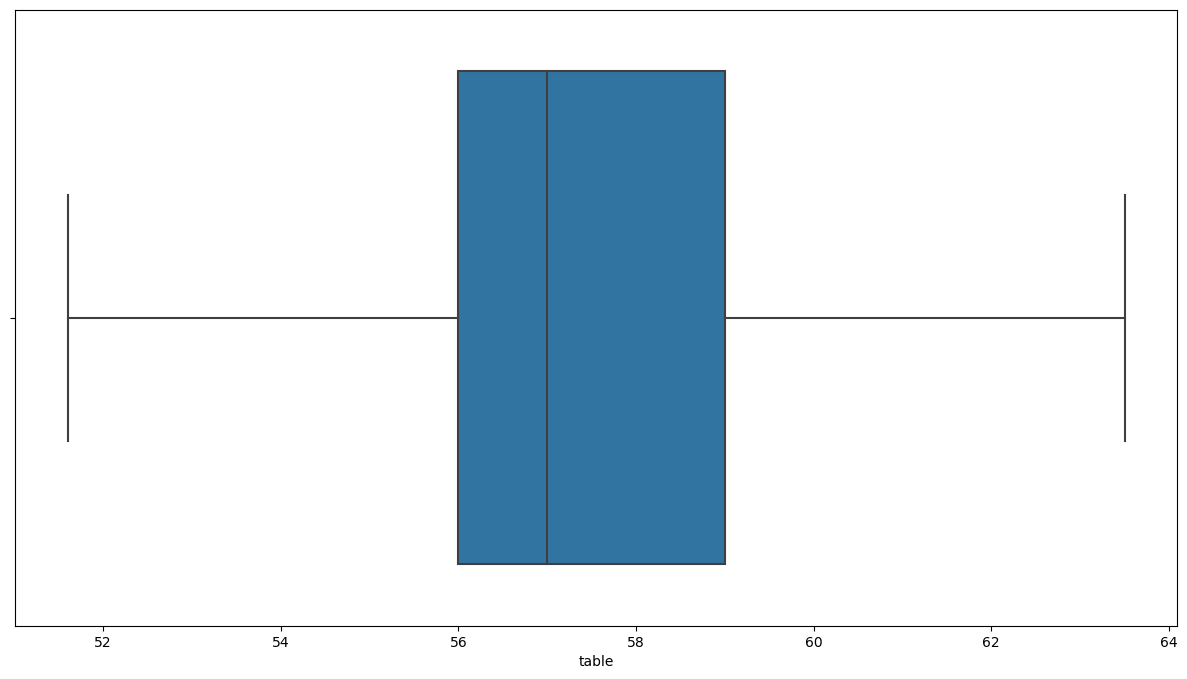

In [55]:
plt.figure(figsize = (15, 8))

sns.boxplot(x = cleaned_df.table);

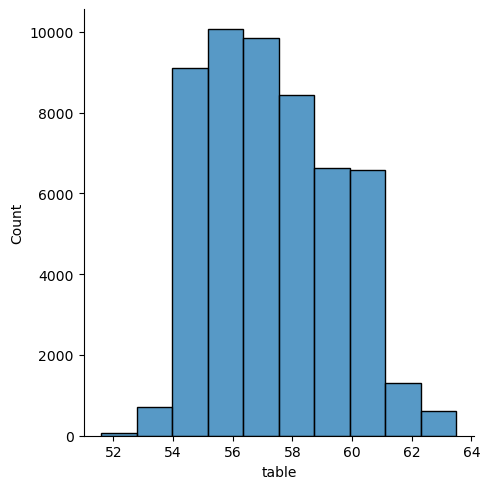

In [56]:
sns.displot(cleaned_df.table, bins=10, kde=False);

In [57]:
cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [58]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Limitation & Transformation of the Outliers</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Limitation using ``.winsorize()`` method

With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively [Source 01](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0) & [Source 02](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html).

In [59]:
from scipy.stats.mstats import winsorize

In [60]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [61]:
df.sort_values("table")

,carat,depth,table,price,x,y,z
11368,1.04,62.9,43.0,4997,6.45,6.41,4.04
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
5979,1.00,64.0,49.0,3951,6.43,6.39,4.10
22701,0.30,64.5,49.0,630,4.28,4.25,2.75
25179,2.00,61.2,50.0,13764,8.17,8.08,4.97
...,...,...,...,...,...,...,...
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58


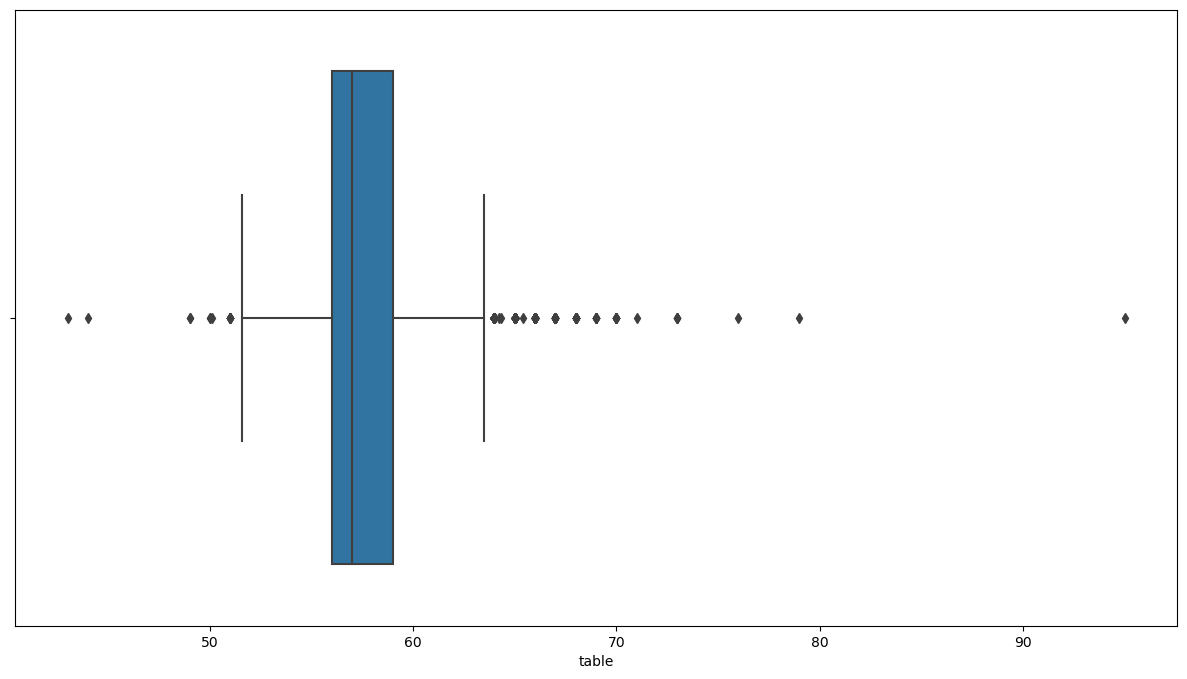

In [62]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = df['table']);

In [63]:
df.table.quantile(0.02)

54.0

In [64]:
df.table.quantile(0.95)  # same as df.table.quantile(1 - .05)

61.0

In [65]:
winsorize(df.table, (0.02, 0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [66]:
lower_lim

51.5

In [67]:
# try just df.table[df.table < lower_lim], then how many?

a = len(df.table[df.table < lower_lim]) / len(df)
a

0.00029662588060808305

These will be the new cut-off points meaning everything `table` value < 51.6 or > 63.5 will be filled in with those values.

In [68]:
df.table.quantile(a)

51.599822024471635

In [69]:
b = len(df.table[df.table > upper_lim]) / len(df.table)
b

0.010919540229885057

In [70]:
df.table.quantile(1-b)

63.50545977011643

In [71]:
upper_lim

63.5

In [72]:
lower_lim

51.5

winsorizing with different bounds, computed from upper_lim and lower_lim.  These are not the values 0.02 and 0.05 used earlier.

In [73]:
table_win = winsorize(df.table, (a, b))  # using percents derived from IQR "fences"
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

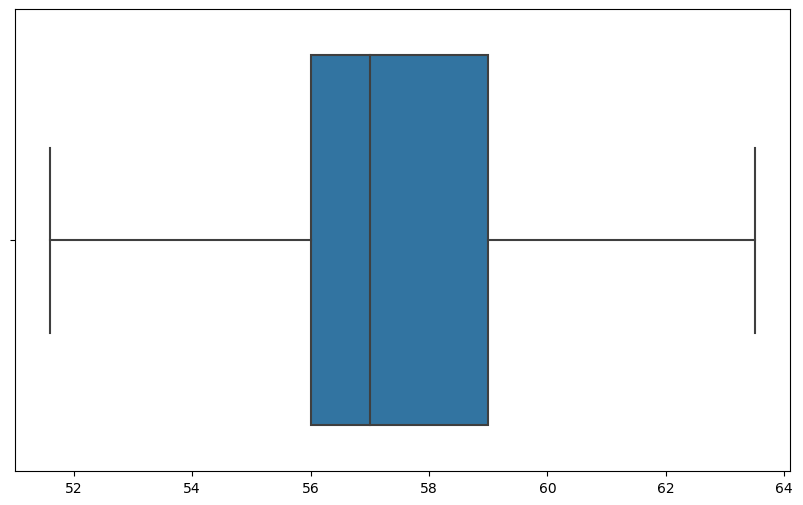

In [74]:
plt.figure(figsize = (10, 6))
sns.boxplot(x=table_win);

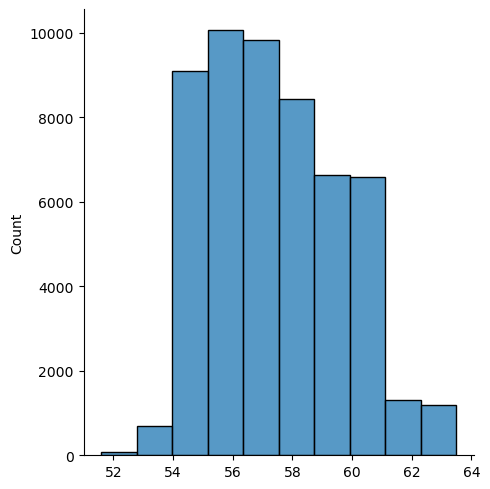

In [75]:
sns.displot(table_win, bins=10, kde=False);

[winsorize at scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html)

[What is a masked array?](https://numpy.org/doc/stable/reference/maskedarray.generic.html)

In [76]:
a = np.array([10, 4, 9, 8, 5, 3, 7, 2, 1, 6])  # simple data

In [77]:
winsorize(a, limits=[0.1, 0.2])  # consider bottom 1 and top 2 as outliers

masked_array(data=[8, 4, 8, 8, 5, 3, 7, 2, 2, 6],
             mask=False,
       fill_value=999999)

In [78]:
ma = winsorize(a, limits=[0.1, 0.2])
type(ma)

numpy.ma.core.MaskedArray

In [79]:
ma.data

array([8, 4, 8, 8, 5, 3, 7, 2, 2, 6])

In [80]:
np.array(ma)

array([8, 4, 8, 8, 5, 3, 7, 2, 2, 6])

Back to our diamonds...

In [81]:
table_win  # returned as a masked array with everything unmasked

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [82]:
df_table_win = pd.Series(table_win) # make it a series

In [83]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
df_table_win.describe()

count    53940.000000
mean        57.438591
std          2.161059
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
dtype: float64

The upper and lower limits below were computed using 1.5 * IQR, basically the whiskers.  

In [84]:
upper_lim, lower_lim  # these were computed using Q1 IQR * 1.5 down from 25%

(63.5, 51.5)

In [85]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [86]:
df.table.sort_values().head(20)  # before winsorizing

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [87]:
df_table_win.sort_values().head(20) # after winsorizing

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [88]:
df_table_win.sort_values()[-610:-585] # everything after row 50313    63.4 is 63.5

985      63.0
6281     63.0
45797    63.0
36932    63.0
10870    63.0
44530    63.0
45905    63.0
37598    63.0
8572     63.0
29568    63.0
45827    63.0
14802    63.0
44567    63.0
3572     63.0
39501    63.0
16122    63.0
5584     63.0
29637    63.0
45600    63.3
50313    63.4
2143     63.5
49612    63.5
43559    63.5
53756    63.5
47149    63.5
dtype: float64

In [89]:
df_table_win[df_table_win == 51.6].count() # high counts of percentile limits

17

In [90]:
df_table_win[df_table_win == 63.5].count() # high counts of percentile limits

590

## Transformation using ``log()`` method

The **``Numpy.log()``** method lets you calculate the mathematical log of any number or array. The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e [Source 01](https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.) & [Source 02](https://numpy.org/doc/stable/reference/generated/numpy.log.html).

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


In [92]:
df["carat"].sort_values()

31593    0.20
31597    0.20
31596    0.20
31595    0.20
31594    0.20
         ... 
25999    4.01
25998    4.01
27130    4.13
27630    4.50
27415    5.01
Name: carat, Length: 53940, dtype: float64

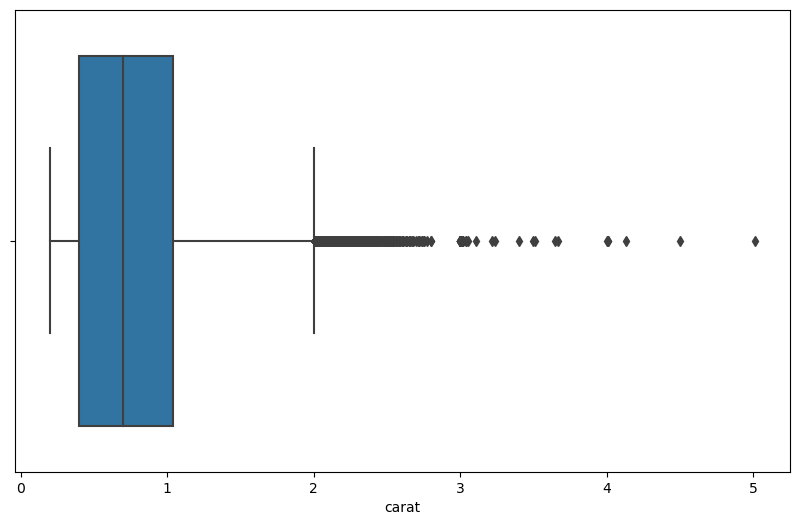

In [93]:
plt.figure(figsize = (10, 6))

sns.boxplot(x=df.carat);

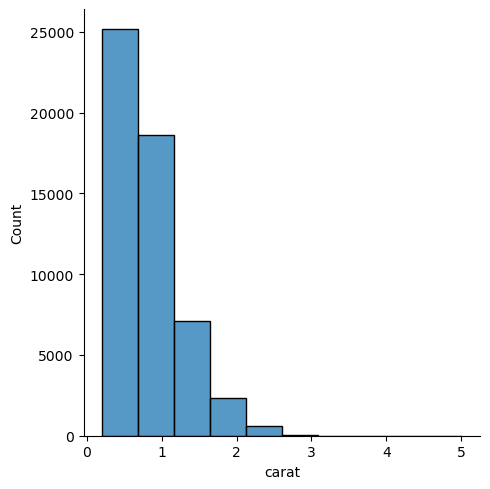

In [94]:
sns.displot(df.carat, bins=10, kde=False);

In [95]:
np.log(df.carat).sort_values()

31593   -1.609438
31597   -1.609438
31596   -1.609438
31595   -1.609438
31594   -1.609438
           ...   
25999    1.388791
25998    1.388791
27130    1.418277
27630    1.504077
27415    1.611436
Name: carat, Length: 53940, dtype: float64

In [96]:
np.e ** 1.609438

5.000000437829517

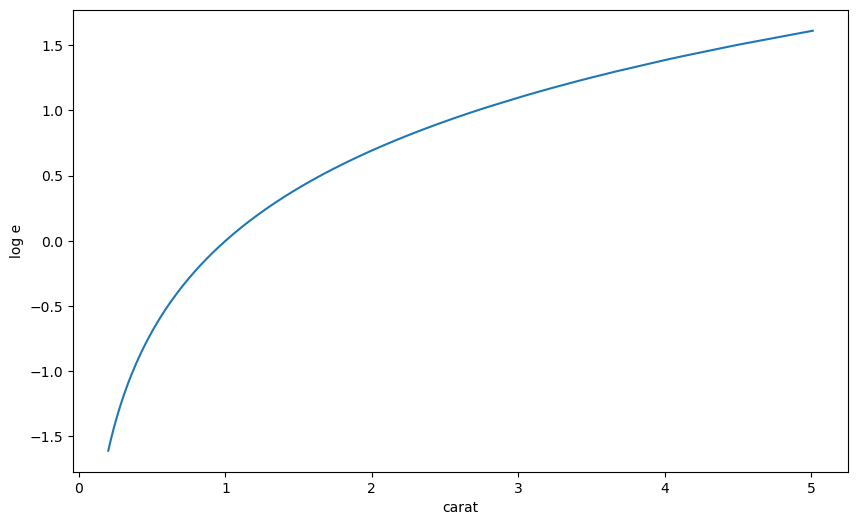

In [97]:
plt.figure(figsize = (10, 6))
plt.plot(df.carat.sort_values(), np.log(df.carat.sort_values()))
plt.xlabel("carat")
plt.ylabel("log e");

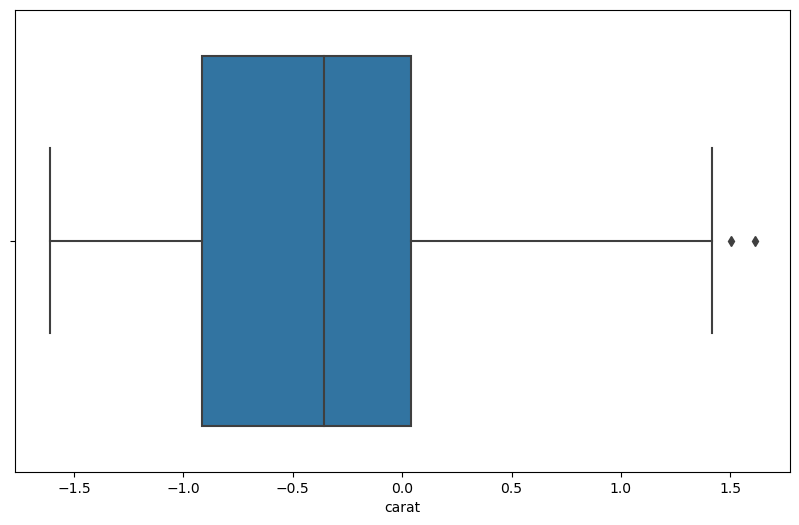

In [98]:
plt.figure(figsize = (10, 6))

sns.boxplot(x = np.log(df.carat));

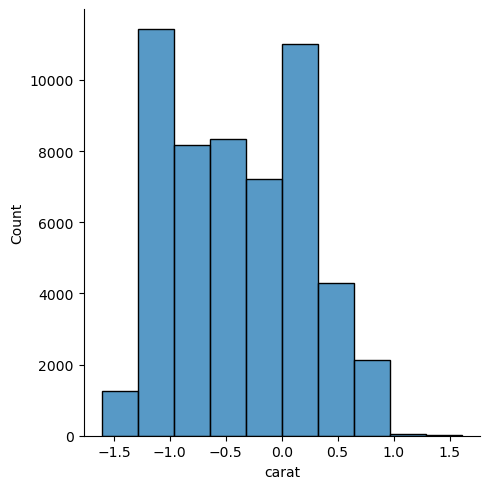

In [99]:
sns.displot(np.log(df.carat),  bins=10, kde=False);

In [100]:
df["carat_log"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


## Removing outliers after log() transformation

In [101]:
Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)

IQR = Q3 - Q1

In [102]:
(1/np.e) ** 1.4

0.24659696394160652

In [103]:
Q1

-0.916290731874155

In [104]:
np.e ** .03922071315328133

1.04

In [105]:
Q3

0.03922071315328133

In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.200000,0.400000,0.700000,1.040000,5.010000
depth,53940.0,61.749405,1.432621,43.000000,61.000000,61.800000,62.500000,79.000000
table,53940.0,57.457184,2.234491,43.000000,56.000000,57.000000,59.000000,95.000000
price,53940.0,3932.799722,3989.439738,326.000000,950.000000,2401.000000,5324.250000,18823.000000
x,53940.0,5.731157,1.121761,0.000000,4.710000,5.700000,6.540000,10.740000
y,53940.0,5.734526,1.142135,0.000000,4.720000,5.710000,6.540000,58.900000
z,53940.0,3.538734,0.705699,0.000000,2.910000,3.530000,4.040000,31.800000
carat_log,53940.0,-0.394967,0.584828,-1.609438,-0.916291,-0.356675,0.039221,1.611436


In [107]:
IQR

0.9555114450274363

In [108]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [109]:
lower_lim

-2.3495578994153097

In [110]:
upper_lim

1.472487880694436

In [111]:
np.e ** lower_lim, np.e ** upper_lim

(0.09541133429939112, 4.3600689902798555)

In [112]:
(df.carat_log < lower_lim).value_counts()

False    53940
Name: carat_log, dtype: int64

In [113]:
(df.carat_log > upper_lim).value_counts() # or try .sum()

False    53938
True         2
Name: carat_log, dtype: int64

In [114]:
(df.carat_log <= lower_lim).sum()

0

In [115]:
df.loc[(df.carat_log > upper_lim)]

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [116]:
outlier_index = df.loc[(df.carat_log > upper_lim)].index
outlier_index

Int64Index([27415, 27630], dtype='int64')

In [117]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [118]:
not_outliers = (df.carat_log <= upper_lim)

In [119]:
len(df[not_outliers])

53938

In [120]:
cleaned_df = df[not_outliers]
cleaned_df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 08</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

____